# Titanic Dataset
This dataset is widely used as a startup guide for data science due to it simplicity and also feature rich data variation.
Maybe you had read the article regarding data exploration or machine learning on using this dataset before, but I hope
you not mind to continue the journey with me.

### Data Dictionary
- survival    -> Survival     ->  	0 = No, 1 = Yes
- pclass      -> Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
- sex         -> Sex
- Age         -> Age in years
- sibsp       -> # of siblings / spouses aboard the Titanic
- parch       -> # of parents / children aboard the Titanic
- ticket      -> Ticket number
- fare        -> Passenger fare
- cabin       -> Cabin number
- embarked    -> Port of Embarkation  -> C = Cherbourg, Q = Queenstown, S = Southampton

## Exploring Data
Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (NIST, 2022) 

## Load Library

In [2]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

## Load Data and Perform Data 
Check the available columns in the dataset

In [3]:
df = pd.read_csv("dataset/titanic.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# checking the first 5 rows of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe().T # the T is inverting the positrion of the columns name and the statistic column

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.info() # checkign the count and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Plotting Graph
Define a bar graph plotting function

In [7]:
# select color pastel
colors = sns.color_palette('pastel')
colors


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [8]:
def bar_plot(dataframe,variable, colors):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = dataframe[variable]
    
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue,color=colors[4])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

Visualize the information for columns of Survived, Sex, Pclass, Embarked, SibSp and Parch.

- to compare the survived count
- to compare the ratio of male to female
- to compare the count of pclass
- to check out the distribution of number of the sibling
- to visualize the distribution of the parch

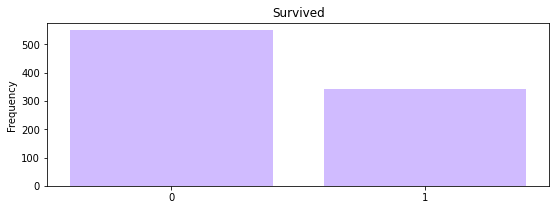

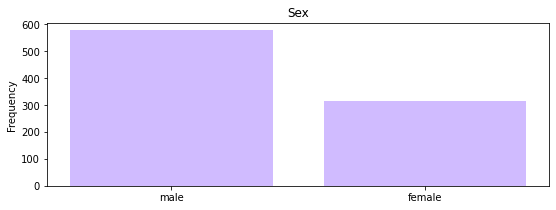

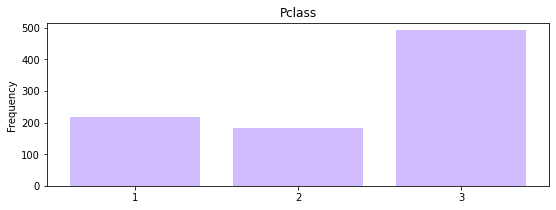

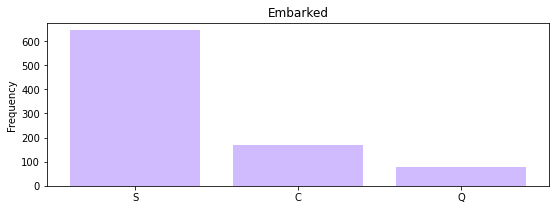

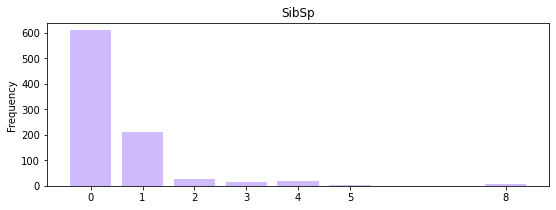

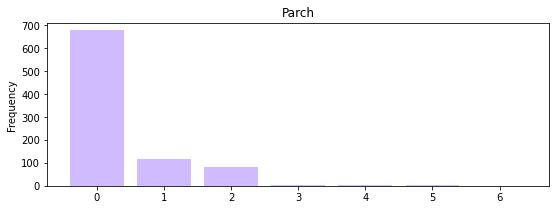

In [9]:
category1 = ["Survived" , "Sex" , "Pclass" , "Embarked" , "SibSp" , "Parch"]
for c in category1:
    bar_plot(df, c,colors)

#### Visualize the Survive Column

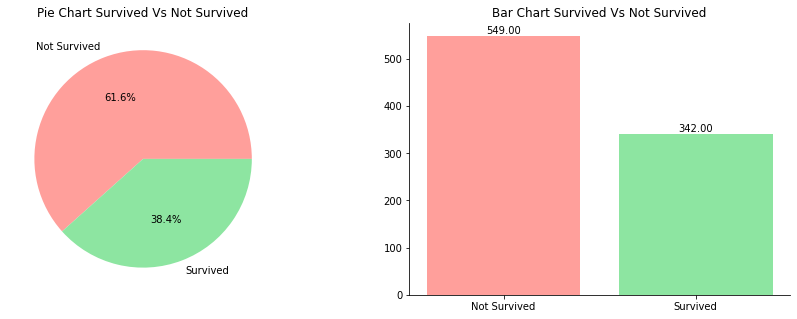

In [10]:
labels= ['Not Survived','Survived']
colors = sns.color_palette('pastel')[3:1:-1]   # Some coding to get red and green colobrs
fig,ax = plt.subplots(1,2,figsize=(15,5))
b = ax[0].pie(df['Survived'].value_counts(),labels=labels,colors=colors,autopct='%.1f%%')
ax[0].set_title('Pie Chart Survived Vs Not Survived')

a = ax[1].bar(labels,df['Survived'].value_counts(),color=colors)
ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].bar_label(a,fmt='%0.2f',fontsize=10)
ax[1].set_title('Bar Chart Survived Vs Not Survived')
plt.show()

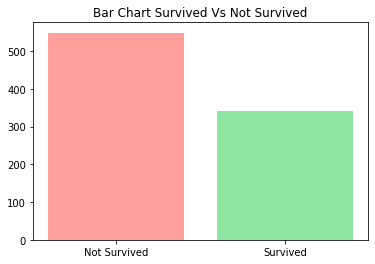

In [11]:
plt.bar(labels,df['Survived'].value_counts(),color=colors)
plt.title('Bar Chart Survived Vs Not Survived')
plt.show()

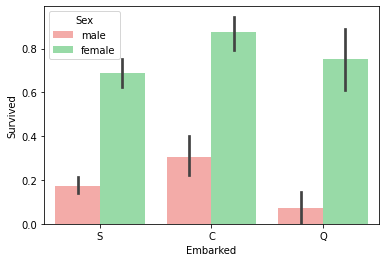

In [12]:
sns.barplot(x='Embarked',y='Survived',data=df,hue='Sex', palette=colors)

plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Count'>

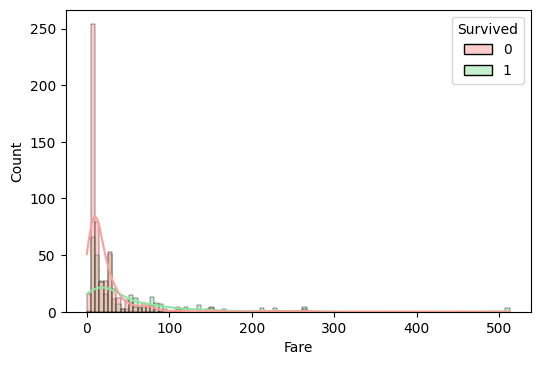

In [13]:
# Fare - 0 to 512
plt.figure(dpi=100)
sns.histplot(data=df,x='Fare',bins=100,kde=True,hue='Survived', palette=colors)

### Featue Analysis

In [14]:
df.groupby(by=['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

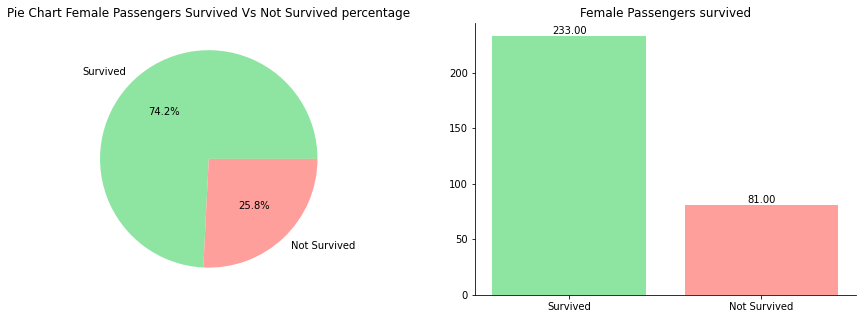

In [15]:


labels= ['Survived','Not Survived']
colors = sns.color_palette('pastel')[2:4]
fig,ax = plt.subplots(1,2,figsize=(15,5))

a = ax[0].pie(df[df['Sex']=='female']['Survived'].value_counts()/df.shape[0]*100,
              labels=labels,
              colors=colors,
              autopct='%.1f%%')
ax[0].set_title('Pie Chart Female Passengers Survived Vs Not Survived percentage')

b = ax[1].bar(labels,df[df['Sex']=='female']['Survived'].value_counts(),color=colors)
ax[1].set_title('Female Passengers survived')
ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].bar_label(b,fmt='%0.2f',fontsize=10)
plt.show()



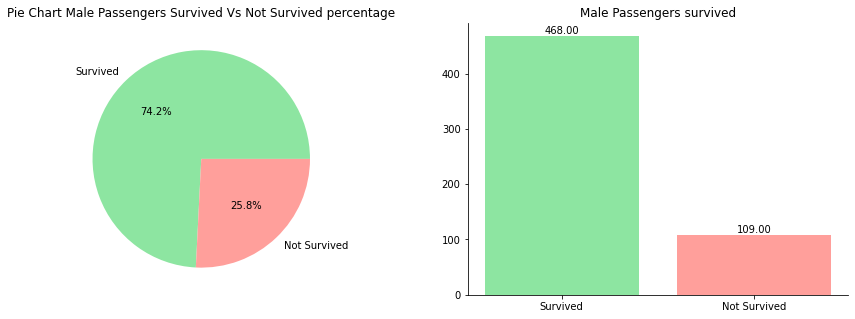

In [16]:
labels= ['Survived','Not Survived']
colors = sns.color_palette('pastel')[2:4]
fig,ax = plt.subplots(1,2,figsize=(15,5))

a = ax[0].pie(df[df['Sex']=='female']['Survived'].value_counts()/df.shape[0]*100,
              labels=labels,
              colors=colors,
              autopct='%.1f%%')
ax[0].set_title('Pie Chart Male Passengers Survived Vs Not Survived percentage')

b = ax[1].bar(labels,df[df['Sex']=='male']['Survived'].value_counts(),color=colors)
ax[1].set_title('Male Passengers survived')
ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].bar_label(b,fmt='%0.2f',fontsize=10)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


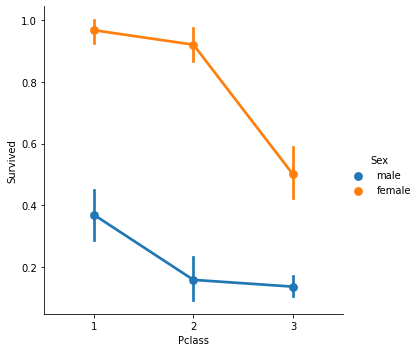

In [17]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

The count of survived is lower, and the number survived female is more than male.

## Investigating the Correlation
To calculate the correlati0on between column, we can use pandas.corr to calculate the correlation for us. It is based on pairwise correlationship - which is a feature selection to identify groups of highly correlated features and only keeping one of them to ensure the model can have as much predictive power (better prediction) using as few features as possible.

Kendall correlationship coefficient - a statistic used to measure the ordinal association between two measured quantities
Pearson correlationship coefficient - a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations

In [18]:
# create a tmp df
tmp = df[["Survived" , "Sex" , "Pclass" , "Embarked" , "SibSp" , "Parch"]]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Pclass    891 non-null    int64 
 3   Embarked  889 non-null    object
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


In [19]:
corr = tmp.corr(method ='pearson')
corr

,Survived,Pclass,SibSp,Parch
Survived,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.035322,0.083081,1.000000,0.414838
Parch,0.081629,0.018443,0.414838,1.000000


<AxesSubplot:>

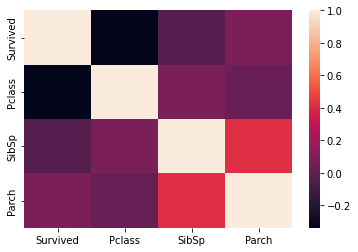

In [20]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [21]:
corr = tmp.corr(method ='kendall')
corr

,Survived,Pclass,SibSp,Parch
Survived,1.000000,-0.323533,0.085915,0.133933
Pclass,-0.323533,1.000000,-0.039552,-0.021019
SibSp,0.085915,-0.039552,1.000000,0.425241
Parch,0.133933,-0.021019,0.425241,1.000000


<AxesSubplot:>

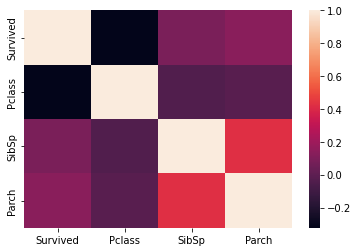

In [22]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Furthur Analysis**

Exploring the relationship between ``survived`` and the selected column
The usage of [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) is to group the data by selected column

In [23]:
pclass_survived = df[["Pclass" , "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)
pclass_survived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
sex_survived = df[["Sex" , "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)
sex_survived

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
df[["Sex" , "Survived"]].groupby(["Sex"], as_index = False).sum()

,Sex,Survived
0,female,233
1,male,109


In [27]:
sibsp_survive = df[["SibSp" , "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False) 
sibsp_survive

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
parch_survive = df[["Parch" , "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False) 
parch_survive

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Data Cleaning
### Outlier
In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses. 

To determine the outlier, we can use the interquatile range(IQR) to filter out the value that is not within the range. 

In [29]:
# function to calculate outlier
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 =  np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices 
        outlier_indices.extend(outlier_list_col)
   
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [30]:
detect_outliers(df,["Age","SibSp","Parch","Fare"]) # get the id of the outlier dataframe, the reason of choosing those columns is because IQR only applicable to int data

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [31]:
df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])] # use built in loc function to locate the outlier data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


We can either dropping out the outliear or compute the median and replace the outlier with median

In [32]:
# dropping the outliear
df_1 = df.drop(detect_outliers(df,["Age", "SibSp","Parch","Fare"]), axis=0).reset_index(drop = True )

In [33]:
df[["Age", "SibSp","Parch","Fare"]].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [34]:
columns = ["Age", "SibSp","Parch","Fare"]

for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    print(x,":", ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum())


Age : 11
SibSp : 46
Parch : 213
Fare : 116


In [35]:

# the reason of using loc is because the normal df[x][y] = mean | median will cause the df to retain a copy of original dataframe, hence the assignation of value is failed
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median 
            if (x == "Age"):
                df.loc[k, x] = mean
            if pd.isnull(df[x][k]):
                if (x == "Age"):
                    df.loc[k, x] = mean
                else:
                    df.loc[k, x] = median


In [36]:
# usage of loc
df.loc[1, "Fare"]

14.4542

In [37]:
# verify outlier after replacing the outier
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    print(x,":", ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum())

Age : 4
SibSp : 0
Parch : 0
Fare : 48


In [38]:
# reading the test dataset
test = pd.read_csv("./dataset/test.csv")
detect_outliers(test,["Age","SibSp","Parch","Fare"]) # no outliear in the test dataset

[]

In [39]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
df[['Age']].describe()

,Age
count,714.000000
mean,29.081737
std,13.622385
min,0.420000
25%,20.125000
50%,28.000000
75%,37.000000
max,64.000000


### Handling Missing Value
In this dataset, there are multiple 

In [41]:
df.columns[df.isnull().any()] # checking the colmn that consist of null value, only the column that return true (for null ) will be display

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [42]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [43]:
df.isnull().sum() # check the count of the missing value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

If possible to fill in the missing value will be better than dropping the data

In [44]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,14.4542,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,14.4542,B28,NaN


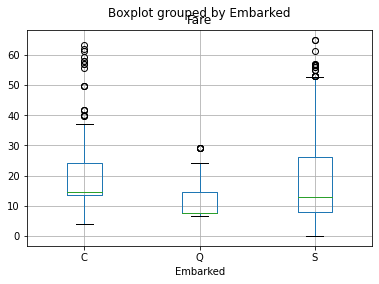

In [45]:
df.boxplot(column = "Fare" , by = "Embarked")
plt.show()

In [46]:
# Since C is the most popular, hence let fill in C for Embarked missing value

df["Embarked"] = df["Embarked"].fillna("C")  # Boş olan değerlere C yazıldı.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [47]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

There is no different `isna` and `isnull`, as per noth isna() and isnull() functions are used to find the missing values in the pandas dataframe. isnull() and isna() literally does the same things. isnull() is just an alias of the isna() method as shown in pandas source code.
The reason of not replacing the missing for Cabin is because the percentage of missing value is too high.

In [48]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## Data Encoding
Machine learning model only take in number, the other data type will encounter error when try to feed them to the machine learning model.
Hence, data encoding is needed to encode those data type to number.

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age'],axis=1, inplace=True)

In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1, inplace=True)

In [53]:
data = df.copy()

df = pd.concat([data,test],axis=0,ignore_index=True)

In [54]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,14.4542,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [56]:
df.to_csv("./dataset/clean.csv")

In [57]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

enc = OneHotEncoder(handle_unknown='ignore')
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)




In [58]:
lr = LogisticRegression()
# fit on the training set
lr.fit(X_train, y_train)
# predict on test set
yhat = lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.64


In [59]:
from sklearn.linear_model import SGDClassifier

sgd =  SGDClassifier()
# fit on the training set
sgd.fit(X_train, y_train)
# predict on test set
yhat = sgd.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.64


In [60]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
# fit on the training set
decision_tree.fit(X_train, y_train)
# predict on test set
yhat = decision_tree.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.58


In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
# fit on the training set
random_forest.fit(X_train, y_train)
# predict on test set
yhat = random_forest.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = random_forest.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 74.92, score of: 74.92


In [62]:
from sklearn.svm import SVC

svc = SVC(probability = True, C = 1, kernel='linear')
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))


Accuracy: 79.66, score of: 79.66


## Hyperparameter Tuning



In [63]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 80, 50, 30, 10, 5.0, 3.0, 1.0, 0.1, 0.2, 0.3, 0.6, 0.01, 0.02, 0.03, 0.001]
tolerant = [0.1, 0.001, 0.001, 0.0015, 0.0001, 0.00013, 0.00001, 0.000001]
max_iter = [100, 500, 1000, 5000, 10000, 50000]
multi_class = ['auto', 'ovr', 'multinomial']

grid = dict(solver=solvers,penalty=penalty,C=c_values, tol=tolerant, max_iter=max_iter, multi_class=multi_class)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
model = LogisticRegression()

lr_random = RandomizedSearchCV(estimator = model, param_distributions = grid, 
                                cv = 7, verbose=0, scoring="accuracy")
lr_random.fit(X_train, y_train)
print(lr_random.best_params_)


{'tol': 0.1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 50000, 'C': 30}


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
63 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError(
ValueError: Only 'sag

In [64]:
# if u have time then only run it, it took a long time to run all the pair match
# solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag']
# penalty = ['l1', 'l2', 'elasticnet']
# c_values = [100, 80, 50, 30, 10, 5.0, 3.0, 1.0, 0.1, 0.2, 0.3, 0.6, 0.01, 0.02, 0.03, 0.001]
# tolerant = [0.1, 0.001, 0.001, 0.0015, 0.0001, 0.00013, 0.00001, 0.000001]
# max_iter = [100, 500, 1000, 5000, 10000, 50000]
# multi_class = ['auto', 'ovr', 'multinomial']

# grid = dict(solver=solvers,penalty=penalty,C=c_values, tol=tolerant, max_iter=max_iter, multi_class=multi_class)
# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
# model = LogisticRegression()

# grid_result = GridSearchCV(estimator = model, param_grid = grid, 
#                                 cv = 7, verbose=0, scoring="f1")
# grid_result.fit(X_train, y_train)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [65]:
# {'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 5000, 'C': 0.1}

lr = LogisticRegression(tol=0.0001, solver='newton-cg', penalty='l2', multi_class='auto',max_iter=5000, C=0.1)
# fit on the training set
lr.fit(X_train, y_train)
# predict on test set
yhat = lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.29


In [66]:
kernels = ['poly', 'rbf', 'sigmoid']
degrees = [1,2,3,4,5]
c_values = [100, 10, 1.0, 0.1, 0.01]
gammas = [1,0.1,0.01,0.001]

grid = dict(kernel=kernels,degree=degrees,C=c_values, gamma=gammas)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
model = SVC()

grid_result = GridSearchCV(estimator = model, param_grid = grid, 
                                cv = 7, verbose=1, scoring="f1")
grid_result.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 7 folds for each of 300 candidates, totalling 2100 fits
Best: 0.744014 using {'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}


In [69]:
svc = SVC(C = 100, kernel='poly', gamma=0.01, degree=1)
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 79.66, score of: 79.66


In [71]:
kernels = ['poly', 'rbf', 'sigmoid']
degrees = [1,2,3,4,5]
c_values = [100, 10, 1.0, 0.1, 0.01]
gammas = [1,0.1,0.01,0.001]

grid = dict(kernel=kernels,degree=degrees,C=c_values, gamma=gammas)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
model = SVC()

grid_result = GridSearchCV(estimator = model, param_grid = grid, 
                                cv = 7, verbose=1, scoring="accuracy")
grid_result.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 7 folds for each of 300 candidates, totalling 2100 fits
Best: 0.833946 using {'C': 10, 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}


In [72]:
svc = SVC(C = 10, kernel='poly', gamma=0.1, degree=5)
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 76.27, score of: 76.27


## Exercise
Create RandomSearchCV for the other models

this is a test